# FIT3179 Data Visualisation 2

Source: https://www.kaggle.com/datasets/alphajuliet/au-dom-traffic?resource=download
Origionally Sourced From: https://data.gov.au/dataset/ds-dga-c5029f2a-39b3-4aef-8ae1-73e7962f6170/details as Domestic Airlines - Top Routes (CSV)

Working with a single data set file containing aggregate details on Australian Domestic Flights each month from Jan-1984 to Aug-2021.

### Verbatim Notes Provided by Original Source

The data cover revenue passengers carried by Australian-registered operators of scheduled regular public transport services over Australian flight stages. 
These estimates include passengers carried between domestic airports on international flights operated by these carriers.
The passengers carried refer to traffic on board by stages.
Traffic on board by stages - The total of all traffic (revenue passengers) on each flight stage between two directly connected airports.

Individual routes shown are restricted to those with an average exceeding 8 000 passengers per month over the previous six months where two or more airlines operate in competition. For the month of March 2016 there were 66 such routes. 
Cells with zero indicate where data is not available or where the route did not meet the publication criteria above.

**Definitions:**
* Aircraft Trips - The number of flight stages. A return flight counts as two aircraft trips.
* Available Seat Kilometres (ASKs) - Calculated by multiplying the number of seats available on each flight stage, by the distance in kilometres between the ports. The distances used are Great Circle Distances.
* City-Pair - The ports shown make up the city-pair route. Passenger movements shown for a city pair reflect total traffic in both directions.
* Distance - Great Circle Distances between two airports.
* Flight Stage - The operation of an aircraft from take-off to landing.
* Passengers Carried - Revenue passengers carried.
* Passenger Load Factor - The total revenue passenger kilometres performed as a percentage of the total available seat kilometres.
* Regular Public Transport Services (RPT) - All air service operations in which aircraft are available for the transport of members of the public and are conducted in accordance with fixed schedules. It does not include charter or other non-scheduled operations.
* Revenue Passengers - All passengers paying any fare. Frequent flyer redemption travellers are regarded as revenue passengers.
* Revenue Passenger Kilometres (RPKs) - Calculated by multiplying the number of revenue passengers travelling on each flight stage, by the distance in kilometres between the ports. The distances used are Great Circle Distances.

### Column Definitions
* City1: The first part of the origin, destination pair. Note the city1 and city2 values show data for flights in both directions.
* City2: The second part of the origin, destination pair.
* Month: The month-year of the flight data shown.
* Passenger Count: The number of passengers flown between the two cities in the given month.
* Flight Count: The number of flights between the two cities in the given month (in either direction).
* Average Capacity (%): How full the plane is in terms of passenger seating capacity. Average value for the month.
* Flight Distance (km): Distance between airports (using Great Circle distance). Is not the actual distance flow.
* Actual Passenger Distance (km): Flight Distance * Passenger Count
* Potential Passenger Distance (km): Flight Distance * Total Seat Available
* Seats: The total number of seats available on flight for the given month between the two locations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, os, random, math

In [97]:
# 1000 Seperator
def format_large_numbers(x):
    return '{:,}'.format(x)

# Set the custom formatting function
pd.options.display.float_format = format_large_numbers

In [98]:
path = 'raw_data.csv'
data = pd.read_csv(path)
new_names = {
    'Passenger_Trips': 'Passenger Count',
    'Aircraft_Trips': 'Flight Count',
    'Passenger_Load_Factor': 'Average Capacity (%)',
    'Distance_GC_(km)': 'Flight Distance (km)',
    'RPKs': 'Actual Passenger Distance (km)',
    'ASKs': 'Potential Passenger Distance (km)'
}
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.rename(columns=new_names, inplace=True)
data.drop(columns=['Year', 'Month_num'], inplace=True)
data = data[data['Average Capacity (%)']<=100]
data['Plane Size (seats)'] = data['Seats'] / data['Flight Count']
data.to_csv('flight_data_cleaned.csv')

In [99]:
data

,City1,City2,Month,Passenger Count,Flight Count,Average Capacity (%),Flight Distance (km),Actual Passenger Distance (km),Potential Passenger Distance (km),Seats,Plane Size (seats)
0,ADELAIDE,ALICE SPRINGS,1984-01-01,15743,143,81.8,1316,20717788,25327369,19246,134.5874125874126
1,ADELAIDE,BRISBANE,1984-01-01,3781,32,89.8,1622,6132782,6829379,4210,131.5625
2,ADELAIDE,CANBERRA,1984-01-01,1339,12,94.7,972,1301508,1374348,1414,117.83333333333333
3,ADELAIDE,DARWIN,1984-01-01,3050,33,66.8,2619,7987950,11958009,4566,138.36363636363637
4,ADELAIDE,GOLD COAST,1984-01-01,1596,16,88.5,1607,2564772,2898047,1803,112.6875
...,...,...,...,...,...,...,...,...,...,...,...
25962,SYDNEY,WAGGA WAGGA,2022-04-01,11318,326,65.6,367,4153706,6328548,17244,52.895705521472394
25963,SYDNEY,WAGGA WAGGA,2022-05-01,12278,351,66.0,367,4506026,6825833,18599,52.98860398860399
25964,SYDNEY,WAGGA WAGGA,2022-06-01,12119,338,66.9,367,4447673,6648572,18116,53.59763313609467
25965,SYDNEY,WAGGA WAGGA,2022-07-01,12863,415,63.4,367,4720721,7450834,20302,48.920481927710846


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25955 entries, 0 to 25966
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   City1                              25955 non-null  object        
 1   City2                              25955 non-null  object        
 2   Month                              25955 non-null  datetime64[ns]
 3   Passenger Count                    25955 non-null  int64         
 4   Flight Count                       25955 non-null  int64         
 5   Average Capacity (%)               25955 non-null  float64       
 6   Flight Distance (km)               25955 non-null  int64         
 7   Actual Passenger Distance (km)     25955 non-null  int64         
 8   Potential Passenger Distance (km)  25955 non-null  int64         
 9   Seats                              25955 non-null  int64         
 10  Plane Size (seats)                

In [96]:
data.describe().round()

,Passenger Count,Flight Count,Average Capacity (%),Flight Distance (km),Actual Passenger Distance (km),Potential Passenger Distance (km),Seats,Plane Size (seats)
count,"25,955.0","25,955.0","25,955.0","25,955.0","25,955.0","25,955.0","25,955.0","23,988.0"
mean,"46,410.0",455.0,67.0,"1,219.0","52,367,431.0","67,441,154.0","60,784.0",121.0
std,"83,061.0",596.0,22.0,842.0,"88,166,012.0","109,193,901.0","103,950.0",50.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"8,324.0",124.0,63.0,538.0,"4,729,438.0","7,049,140.0","12,491.0",79.0
50%,"17,157.0",303.0,73.0,956.0,"17,458,765.0","24,952,928.0","24,563.0",127.0
75%,"50,614.0",535.0,80.0,"1,622.0","53,270,430.0","70,771,386.0","67,723.0",161.0
max,"834,347.0","5,397.0",100.0,"3,615.0","591,587,042.0","705,952,104.0","959,123.0",420.0


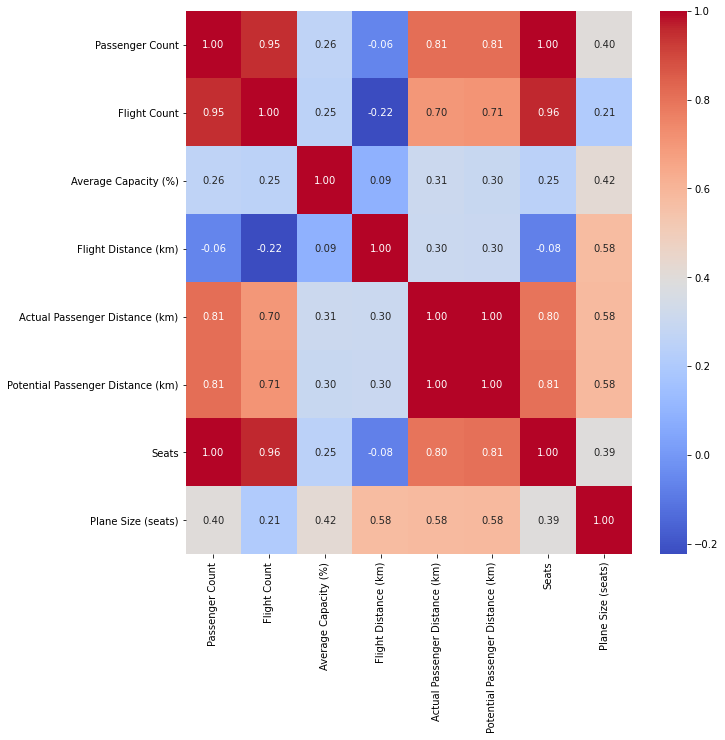

In [92]:
def heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
heatmap(data)

## Secondary Dataset
There is a secondary dataset which contains location data for each of the cities. Latitude, Longitude, Population, Area.

This dataset was sourced from Chat-GPT (Sep/25 Version).
Prompts:
* 'I am going to give a list of places in australia. I want a CSV response with the following data about each. Latitude, Longitude, Population, Area (km sq), State. The cities: ADELAIDE,ALBURY,ALICE SPRINGS,BRISBANE,BROOME,CANBERRA,COFFS HARBOUR,DARWIN,DEVONPORT,DUBBO,GOLD COAST,HOBART,KALGOORLIE,KARRATHA,LAUNCESTON,MELBOURNE,PERTH,SUNSHINE COAST,SYDNEY,CAIRNS,BALLINA,HERVEY BAY,PORT MACQUARIE,NEWCASTLE,HAMILTON ISLAND,AYERS ROCK,GERALDTON,BUNDABERG,ARMIDALE,PROSERPINE,MACKAY,ROCKHAMPTON,TOWNSVILLE,BURNIE,MILDURA,WAGGA WAGGA,PORT LINCOLN,PORT HEDLAND,NEWMAN,GLADSTONE,EMERALD,MOUNT ISA,MORANBAH,TAMWORTH'
* Give me the same data but: 1. Abbreviate the State Names, 2. Add a boolean (True, False) field 'Is State Capitol', 3. Add a field 'Airport distance to CBD (km).

In [66]:
cities = data['City1'].append(data['City2']).unique()
cols = ['Lat', 'Long', 'Pop', 'Area (km sq)', 'State', 'Is Capitol', 'Airport Distance to CBD']
data_locations = pd.read_csv('location_data.csv')

In [67]:
print(data_locations.shape)
data_locations

(44, 8)


,City,Latitude,Longitude,Population,Area (km sq),State,Is State Capitol,Airport distance to CBD (km)
0,ADELAIDE,-34.9285,138.6007,1345777,1826.9,SA,True,6.8
1,ALBURY,-36.0737,146.9135,52681,53.2,NSW,False,4.0
2,ALICE SPRINGS,-23.6980,133.8813,24273,148.5,NT,False,14.3
3,BRISBANE,-27.4698,153.0251,2482114,1607.6,QLD,True,16.6
4,BROOME,-17.9614,122.2359,14200,55.8,WA,False,2.7
5,CANBERRA,-35.2809,149.1300,431114,814.2,ACT,True,7.7
6,COFFS HARBOUR,-30.2963,153.1136,75006,73.5,NSW,False,3.8
7,DARWIN,-12.4634,130.8456,147255,112.0,NT,True,8.3
8,DEVONPORT,-41.1771,146.3470,25852,23.0,TAS,False,7.1
9,DUBBO,-32.2569,148.6013,38868,342.9,NSW,False,5.2


In [73]:
for i in data['City1'].unique():
    print(i, str(i in data['City2'].unique()))

ADELAIDE False
ALBURY False
ALICE SPRINGS True
BRISBANE True
BROOME False
CANBERRA True
COFFS HARBOUR False
DARWIN True
DEVONPORT False
DUBBO False
GOLD COAST True
HOBART True
KALGOORLIE False
KARRATHA False
LAUNCESTON True
MELBOURNE True
PERTH True
SUNSHINE COAST False
SYDNEY True
CAIRNS True
BALLINA True
HERVEY BAY False
PORT MACQUARIE False
NEWCASTLE True
HAMILTON ISLAND True
AYERS ROCK False
GERALDTON False
BUNDABERG False
ARMIDALE False
PROSERPINE True


In [80]:
data['City1'].unique()

array(['ADELAIDE', 'ALBURY', 'ALICE SPRINGS', 'BRISBANE', 'BROOME',
       'CANBERRA', 'COFFS HARBOUR', 'DARWIN', 'DEVONPORT', 'DUBBO',
       'GOLD COAST', 'HOBART', 'KALGOORLIE', 'KARRATHA', 'LAUNCESTON',
       'MELBOURNE', 'PERTH', 'SUNSHINE COAST', 'SYDNEY', 'CAIRNS',
       'BALLINA', 'HERVEY BAY', 'PORT MACQUARIE', 'NEWCASTLE',
       'HAMILTON ISLAND', 'AYERS ROCK', 'GERALDTON', 'BUNDABERG',
       'ARMIDALE', 'PROSERPINE'], dtype=object)

In [79]:
data['City2'].unique()

array(['ALICE SPRINGS', 'BRISBANE', 'CANBERRA', 'DARWIN', 'GOLD COAST',
       'MELBOURNE', 'PERTH', 'SYDNEY', 'CAIRNS', 'MACKAY', 'PROSERPINE',
       'ROCKHAMPTON', 'TOWNSVILLE', 'BURNIE', 'MILDURA', 'NEWCASTLE',
       'WAGGA WAGGA', 'PORT LINCOLN', 'HAMILTON ISLAND', 'PORT HEDLAND',
       'HOBART', 'NEWMAN', 'GLADSTONE', 'EMERALD', 'MOUNT ISA',
       'MORANBAH', 'LAUNCESTON', 'BALLINA', 'TAMWORTH'], dtype=object)

In [84]:
trips = pd.Series(data['City1']+' - '+data['City2']).unique()

In [87]:
sorted(trips)

['ADELAIDE - ALICE SPRINGS',
 'ADELAIDE - BRISBANE',
 'ADELAIDE - CAIRNS',
 'ADELAIDE - CANBERRA',
 'ADELAIDE - DARWIN',
 'ADELAIDE - GOLD COAST',
 'ADELAIDE - HOBART',
 'ADELAIDE - MELBOURNE',
 'ADELAIDE - PERTH',
 'ADELAIDE - PORT LINCOLN',
 'ADELAIDE - SYDNEY',
 'ALBURY - SYDNEY',
 'ALICE SPRINGS - DARWIN',
 'ALICE SPRINGS - MELBOURNE',
 'ALICE SPRINGS - SYDNEY',
 'ARMIDALE - SYDNEY',
 'AYERS ROCK - SYDNEY',
 'BALLINA - SYDNEY',
 'BRISBANE - CAIRNS',
 'BRISBANE - CANBERRA',
 'BRISBANE - DARWIN',
 'BRISBANE - EMERALD',
 'BRISBANE - GLADSTONE',
 'BRISBANE - HAMILTON ISLAND',
 'BRISBANE - HOBART',
 'BRISBANE - LAUNCESTON',
 'BRISBANE - MACKAY',
 'BRISBANE - MELBOURNE',
 'BRISBANE - MORANBAH',
 'BRISBANE - MOUNT ISA',
 'BRISBANE - NEWCASTLE',
 'BRISBANE - PERTH',
 'BRISBANE - PROSERPINE',
 'BRISBANE - ROCKHAMPTON',
 'BRISBANE - SYDNEY',
 'BRISBANE - TOWNSVILLE',
 'BROOME - PERTH',
 'BUNDABERG - BRISBANE',
 'CAIRNS - GOLD COAST',
 'CAIRNS - MELBOURNE',
 'CAIRNS - SYDNEY',
 'CAIRNS - TOWN